In [7]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [89]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-02-01')

In [90]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,143.160004
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,142.059998
2021-01-28,141.990005,136.699997,139.520004,137.089996,142621100.0,137.089996


In [91]:
df.shape

(2285, 6)

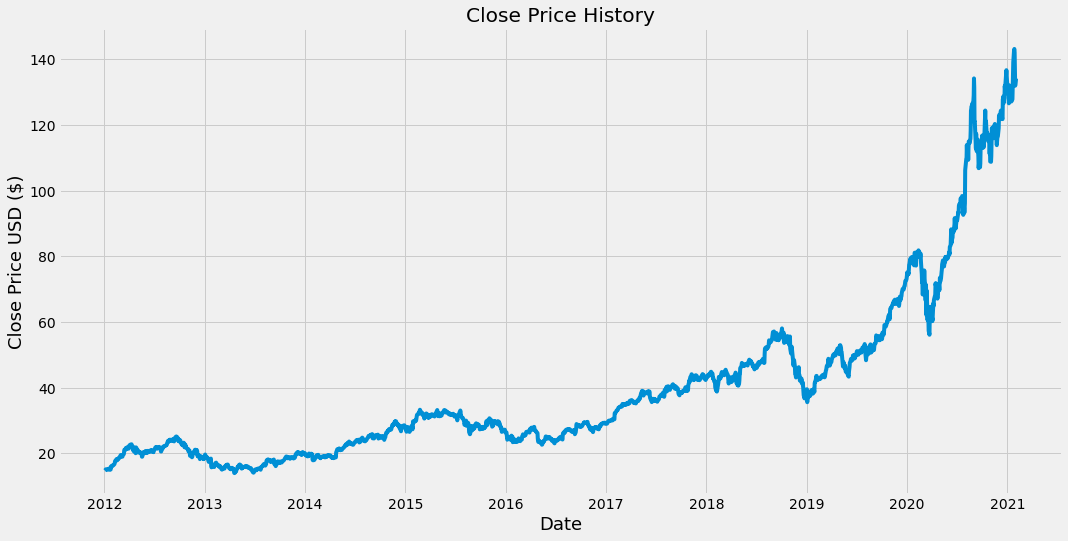

In [92]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [93]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,143.160004
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,142.059998
2021-01-28,141.990005,136.699997,139.520004,137.089996,142621100.0,137.089996


In [94]:
data = df.filter(['Close'])


In [95]:
dataset=data.values

In [96]:
dataset

array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [137.08999634],
       [131.96000671],
       [134.13999939]])

In [231]:
training_data_len = math.ceil(len(dataset) *1)

In [232]:
training_data_len

2285

In [233]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [234]:
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.95302307],
       [0.91332111],
       [0.93019248]])

In [235]:
train_data = scaled_data[0:training_data_len, :]

In [236]:
train_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.95302307],
       [0.91332111],
       [0.93019248]])

In [237]:
len(train_data)

2285

In [238]:
x_train = []

In [239]:
y_train = []

In [240]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    

In [241]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [242]:
x_train.shape

(2225, 60)

In [243]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [244]:
x_train.shape

(2225, 60, 1)

In [245]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [246]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [248]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2225/2225 [==============================] - 27s 12ms/step - loss: 5.0743e-04
Epoch 2/5
2225/2225 [==============================] - 27s 12ms/step - loss: 4.0932e-04
Epoch 3/5
2225/2225 [==============================] - 28s 13ms/step - loss: 3.3471e-04
Epoch 4/5
2225/2225 [==============================] - 27s 12ms/step - loss: 2.7875e-04
Epoch 5/5
2225/2225 [==============================] - 27s 12ms/step - loss: 2.3191e-04


In [249]:
test_data = scaled_data[training_data_len - 60: , :]

In [250]:
test_data

array([[0.78167742],
       [0.81325333],
       [0.81062203],
       [0.79228013],
       [0.78957143],
       [0.81681335],
       [0.81464639],
       [0.81503337],
       [0.82308213],
       [0.81603944],
       [0.80551414],
       [0.81023505],
       [0.80017408],
       [0.77316433],
       [0.78338005],
       [0.79003576],
       [0.79436969],
       [0.81340815],
       [0.84181096],
       [0.84459707],
       [0.84351359],
       [0.83817353],
       [0.84978231],
       [0.85465798],
       [0.8345361 ],
       [0.84583531],
       [0.83941183],
       [0.8345361 ],
       [0.88174514],
       [0.8812034 ],
       [0.88809127],
       [0.87230338],
       [0.88445385],
       [0.91270196],
       [0.90558192],
       [0.91339845],
       [0.94992744],
       [0.93584206],
       [0.92694204],
       [0.91897068],
       [0.89358615],
       [0.90596878],
       [0.87183899],
       [0.90527228],
       [0.9140176 ],
       [0.89025824],
       [0.88886524],
       [0.905

In [251]:
x_test=[]
y_test= dataset[training_data_len: , :]

In [252]:
len(test_data)

60

In [253]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [254]:
x_test = np.array(x_test)

In [255]:
x_test.shape

(0,)

In [193]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [194]:
x_test.shape

(457, 60, 1)

In [204]:
pd.DataFrame(x_test)

ValueError: Must pass 2-d input

In [195]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [196]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.3789912250944507

<ipython-input-197-22a911ad540e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


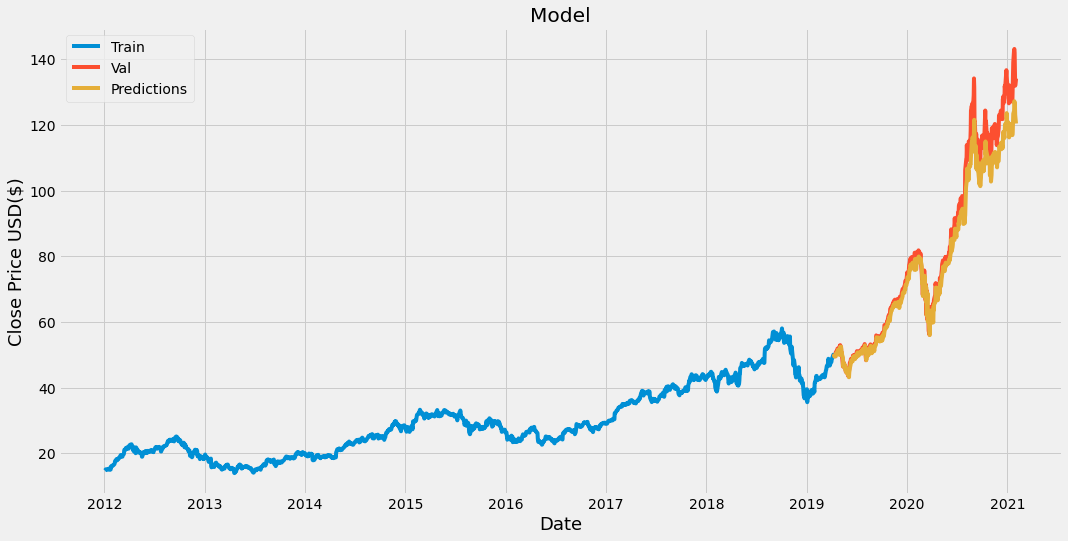

In [197]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'upper left')
plt.show()


In [203]:
valid

,Close,Predictions
Date,,
2019-04-10,50.154999,49.506496
2019-04-11,49.737499,49.824883
2019-04-12,49.717499,49.444931
2019-04-15,49.807499,49.460701
2019-04-16,49.812500,49.535076
...,...,...
2021-01-26,143.160004,127.235840
2021-01-27,142.059998,126.757736
2021-01-28,137.089996,126.370773


In [198]:
pwd

'D:\\'

In [206]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2021-02-03')

In [207]:
new_df = apple_quote.filter(['Close'])

In [208]:
new_df

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2021-01-27,142.059998
2021-01-28,137.089996
2021-01-29,131.960007


In [273]:
last_60_days = new_df[-60:].values

In [274]:
last_60_days

array([[119.02999878],
       [118.69000244],
       [116.31999969],
       [115.97000122],
       [119.48999786],
       [119.20999908],
       [119.26000214],
       [120.30000305],
       [119.38999939],
       [118.02999878],
       [118.63999939],
       [117.33999634],
       [113.84999847],
       [115.16999817],
       [116.02999878],
       [116.58999634],
       [119.05000305],
       [122.72000122],
       [123.08000183],
       [122.94000244],
       [122.25      ],
       [123.75      ],
       [124.37999725],
       [121.77999878],
       [123.23999786],
       [122.41000366],
       [121.77999878],
       [127.87999725],
       [127.80999756],
       [128.69999695],
       [126.66000366],
       [128.22999573],
       [131.88000488],
       [130.96000671],
       [131.97000122],
       [136.69000244],
       [134.86999512],
       [133.72000122],
       [132.69000244],
       [129.41000366],
       [131.00999451],
       [126.59999847],
       [130.91999817],
       [132

In [275]:
last_60_days_scaled = scaler.transform(last_60_days)

In [276]:
X_test=[]

In [277]:
X_test.append(last_60_days_scaled)

In [278]:
X_test = np.array(X_test)

In [279]:
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [280]:
pred_price= model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

In [281]:
print(pred_price)

[[145.21422]]


In [262]:
last_60_days

array([[119.02999878],
       [118.69000244],
       [116.31999969],
       [115.97000122],
       [119.48999786],
       [119.20999908],
       [119.26000214],
       [120.30000305],
       [119.38999939],
       [118.02999878],
       [118.63999939],
       [117.33999634],
       [113.84999847],
       [115.16999817],
       [116.02999878],
       [116.58999634],
       [119.05000305],
       [122.72000122],
       [123.08000183],
       [122.94000244],
       [122.25      ],
       [123.75      ],
       [124.37999725],
       [121.77999878],
       [123.23999786],
       [122.41000366],
       [121.77999878],
       [127.87999725],
       [127.80999756],
       [128.69999695],
       [126.66000366],
       [128.22999573],
       [131.88000488],
       [130.96000671],
       [131.97000122],
       [136.69000244],
       [134.86999512],
       [133.72000122],
       [132.69000244],
       [129.41000366],
       [131.00999451],
       [126.59999847],
       [130.91999817],
       [132